In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.2.0-rc1


In [0]:
from tensorflow.keras.layers import Flatten, Input, Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train[0].shape)

(28, 28)


In [21]:
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
#x = Flatten()(x)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              epochs=10,
              )


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3240 - accuracy: 0.8961 - val_loss: 0.1218 - val_accuracy: 0.9636
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1039 - accuracy: 0.9690 - val_loss: 0.0716 - val_accuracy: 0.9788
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0698 - accuracy: 0.9787 - val_loss: 0.0630 - val_accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0561 - accuracy: 0.9831 - val_loss: 0.0637 - val_accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0454 - accuracy: 0.9863 - val_loss: 0.0561 - val_accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0472 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0419 - val_accuracy:

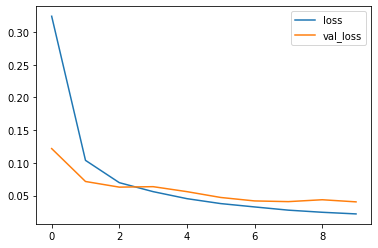

In [22]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

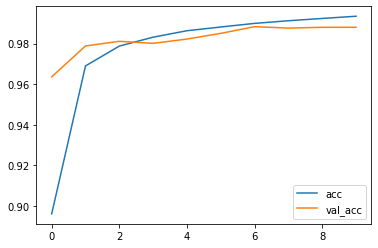

In [23]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 972    0    0    0    0    0    5    2    1    0]
 [   0 1130    1    0    0    0    1    1    2    0]
 [   1    0 1023    2    1    0    1    2    2    0]
 [   0    0    5  995    0    7    0    1    2    0]
 [   1    0    1    0  966    0    4    1    0    9]
 [   0    1    0    5    0  883    1    0    2    0]
 [   0    3    1    0    0    4  949    0    1    0]
 [   0    3    7    2    2    0    0 1013    0    1]
 [   2    0    2    1    0    4    0    2  962    1]
 [   1    0    0    4    5    6    0    6    0  987]]


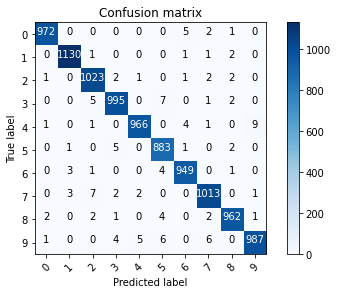

In [24]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


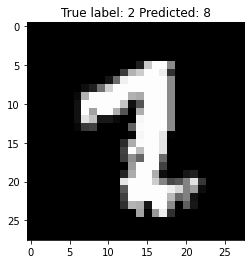

In [31]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));